In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**JobType** - Ваш вид деятельности:

**Name** - ФИО(По желанию)

**Age** - Ваш возраст:

**Products** - Чем вы пользуетесь для анализа данных?

**Specialization** - Какая у вас специализация на учёбе/работе(например "эндокринология"/"молекулярная биология")?

**InterfaceDifficulties** - Бывают ли у вас сложности в работе, вызванные неинтуитивным интерфейсом?

**OneSoftwareUsage** - Вы выполняете анализ данных в одной программе?

**MethodicalLiterature** - Вы встречаетесь с необходимостью изучать разную методическую литературу при работе с программами для анализа данных?

**MathStatSkills** - Как бы вы оценили свою математическую и статистическую подготовку от 1 до 5(1 - крайне слабая, 5 - очень сильная)?

**InterpretationDifficulties** - Сталкивались ли вы с проблемой в понимании того, как правильно проинтерпретировать результаты статистических тестов?

**BioequivalenceIsLongTime** - Много ли времени занимает у вас проведение анализа биоэквивалентности?

**EnoughPracExperience** - Вы имеете достаточно практического опыта в использовании статистических программ?

**NeedWideRangeOfTests** - Вам важно, чтобы в используемом вами продукте был представлен широкий набор статистических тестов?

**NecessaryStatTests** - Какими статистическими тестами и критериями вы пользуетесь регулярно и их наличие в программе для вас критически необходимо?

**InterfaceDifficulties_long** - Расскажите, в чем проявлялись трудности, вызванные неинтуитивным интерфейсом?

**SoftwareUsage_long** - Чем для вас вызвана необходимость пользоваться больше чем одной программой для анализа данных?

**InterpretationDifficulties_long1** - Расскажите, интерпретация результатов каких статистических методов для вас наиболее затруднительна?

**InterpretationDifficulties_long2** - Что могло бы помочь вам тратить на интерпретацию результатов меньше времени и сил?

**SimpleDataAnalysis** - Вы сталкивались с ситуациями, когда вам нужно было быстро провести простой анализ данных, и вы не хотели ради этого использовать языки программирования или тяжелые программы?

**WideRangeOfModels** - Вам важно наличие широкого набора прогностических моделей в продукте, которым вы пользуетесь?

**HyperparamsInteractiveMode** - Вы хотели бы иметь возможность настраивать гиперпараметры модели в интерактивном режиме?

**SimpleDataAnalysis_long** - Какой анализ данных вы хотели бы выполнять без использования языков программирования и тяжелых статистических программ?

**WideRangeOfModels_long** - Какие прогностические модели вы используете в своей работе?

**OtherProblems** - В данном опросе мы постарались затронуть основные направления нашего ближайшего развития. Если у вас есть какие-то проблемы, которые мы упустили, то, пожалуйста, расскажите о них тут:

**Contacts** - Если у вас есть желание дополнительно помочь нам и рассказать о ваших пожеланиях к тому, что вы хотели бы видеть в нашем продукте, тут вы можете оставить ваши контактные данные, мы обязательно с вами свяжемся

In [ ]:
columns = ['JobType', 'Name',
       'Age', 'Products',
       'Specialization',
       'InterfaceDifficulties',
       'OneSoftwareUsage',
       'MethodicalLiterature',
       'MathStatSkills',
       'InterpretationDifficulties',
       'BioequivalenceIsLongTime',
       'EnoughPracExperience',
       'NeedWideRangeOfTests',
       'NecessaryStatTests',
       'InterfaceDifficulties_long',
       'SoftwareUsage_long',
       'InterpretationDifficulties_long1',
       'InterpretationDifficulties_long2',
       'SimpleDataAnalysis',
       'WideRangeOfModels',
       'HyperparamsInteractiveMode',
       'SimpleDataAnalysis_long',
       'WideRangeOfModels_long',
       'OtherProblems',
       'Contacts']

In [ ]:
data = pd.read_csv("SmartMedicine.csv")
data = data.drop(['Отметка времени'], axis=1)
data.columns = columns
data.head()

## обработка

In [ ]:
BinaryCols = ['InterfaceDifficulties', 'OneSoftwareUsage', 'MethodicalLiterature',
              'InterpretationDifficulties', 'EnoughPracExperience', 'NeedWideRangeOfTests',
              'SimpleDataAnalysis', 'WideRangeOfModels', 'HyperparamsInteractiveMode']

In [ ]:
data['BioequivalenceIsLongTime'] = data['BioequivalenceIsLongTime'].map({'Да': 1, 'Нет': 0, 'Я не провизор/Не занимался(ась) этим': -1})
for Cols in BinaryCols:
    data[Cols] = data[Cols].map({'Да': 1, 'Нет': 0, np.nan: -1})

In [ ]:
data['SimpleDataAnalysis'] = data['SimpleDataAnalysis'].map({1: 1, 0: 0, -1: np.nan})

In [ ]:
data['WideRangeOfModels'] = data['WideRangeOfModels'].map({1: 1, 0: 0, -1: np.nan})

In [ ]:
data['HyperparamsInteractiveMode'] = data['HyperparamsInteractiveMode'].map({1: 1, 0: 0, -1: np.nan})

In [ ]:
data['Specialization'] = data['Specialization'].replace(['Медик-аналитик', 'Менеджмент высшее сестринское дело',
                              'Нет', 'медицинская информатика', np.nan], 'Другое')

In [ ]:
data['Specialization'] = data['Specialization'].replace(['Биоинженерия', 'Биоинженерия и биоинформатика ',
                              'Медицинская биофизика'], 'Биоинженерия/биоинформатика/биофизика')

In [ ]:
data['Specialization'] = data['Specialization'].replace(['Исследования биоэквивалентности', 'Провизор организатор',
                              'Провизор-технолог', 'Провизор, зав. аптекой. ',
                              'Фарма ', 'Фармакология', 'Фармакология ',
                              'Фармацевтическая технология/ управление и экономика фармации'], 'Провизор/фармацевт')

In [ ]:
data['Specialization'] = data['Specialization'].replace(['врач общей практики', 'Лечебное дело',
                              'Педиатр, массажист ', 'Педиатрия',
                              'педиатрия, пульмонология, организация здравоохранения и общественное здоровье',
                              'Студент -лечебник', 'Студент лечебного факультета',
                              'Терапия', 'Терапия ', 'физиология'], 'Врач широкой практики')

In [ ]:
data['Specialization'] = data['Specialization'].replace(['Акушерство-гинекология ',
                              'акушерство и гинекология','Гинекология', 'Гинекология оперативная ',
                              'Гинеколог'], 'Акушерство и гинекология')

In [ ]:
data['Specialization'] = data['Specialization'].replace(['Анестезиология', 'Гастроэнтерология',
                              'Дерматовенерология', 'Кардиология', 'Кардиология, функциональная диагностика',
                              'Лаб диагностика', 'ЛОР', 'Неврология', 'Онкология', 'Пульмонология',
                              'Реаниматология', 'Ревматология', 'Рентгеноэндоваскулярная хирургия',
                              'Урология', 'Урология ', 'Хирургия', 'Хирургия ', 'Эндокринология',
                              'Эндокринология ', 'Эндоскопия', 'эндоскопия', 'Психиатрия',
                              'Нейробиология/нейрохирургия', 'стоматология', 'Стоматология детская '], 'Врач узкой практики')

In [ ]:
data['Specialization'] = data['Specialization'].replace(['Аналитик', 'Аналитик/Фармхимия и фармакогнозия'], 'Медик-аналитик')

In [ ]:
data['Specialization'].value_counts()

Врач узкой практики                      29
Врач широкой практики                    23
Другое                                    9
Провизор/фармацевт                        8
Акушерство и гинекология                  7
Биоинженерия/биоинформатика/биофизика     3
Медик-аналитик                            2
Name: Specialization, dtype: int64

In [ ]:
data['Specialization'].unique()

array(['Акушерство и гинекология', 'Медик-аналитик',
       'Врач узкой практики', 'Биоинженерия/биоинформатика/биофизика',
       'Врач широкой практики', 'Провизор/фармацевт', 'Другое'],
      dtype=object)

In [ ]:
data['Specialization'] = data['Specialization'].replace(['Акушерство и гинекология', 'Медик-аналитик', 'Биоинженерия/биоинформатика/биофизика'], 'Другое')

In [ ]:
data['WideRangeOfModels_long'] = data['WideRangeOfModels_long'].apply(lambda r: str(r).split(', '))

In [ ]:
data['WideRangeOfModels_long']

0                                                 [nan]
1         [Логистическая регрессия, Линейная регрессия]
2                                                 [nan]
3                                      [Нейронные сети]
4                                                 [nan]
                            ...                        
76                                                [nan]
77                                                [nan]
78                                                [nan]
79                                                [nan]
80    [Логистическая регрессия, Линейная регрессия, ...
Name: WideRangeOfModels_long, Length: 81, dtype: object

In [ ]:
data['Log_Reg'] = 0
data['Lin_Reg'] = 0
data['KNN'] = 0
data['SVMs'] = 0
data['Dec_Tree'] = 0
data['Rand_Forest'] = 0
data['Neur_Net'] = 0
data['Other'] = 0

In [ ]:
x = 'WideRangeOfModels_long'
data['Log_Reg'] = data[[x,'Log_Reg']].apply(lambda r: 1 if 'Логистическая регрессия' in r[x] else 0, axis = 1)
data['Lin_Reg'] = data[[x,'Lin_Reg']].apply(lambda r: 1 if 'Линейная регрессия' in r[x] else 0, axis = 1)
data['KNN'] = data[[x,'KNN']].apply(lambda r: 1 if 'K ближайших соседей (KNN)' in r[x] else 0, axis = 1)
data['SVMs'] = data[[x,'SVMs']].apply(lambda r: 1 if 'Метод опорных векторов (SVMs)' in r[x] else 0, axis = 1)
data['Dec_Tree'] = data[[x,'Dec_Tree']].apply(lambda r: 1 if 'Деревья решений' in r[x] else 0, axis = 1)
data['Rand_Forest'] = data[[x,'Rand_Forest']].apply(lambda r: 1 if 'Случайный лес' in r[x] else 0, axis = 1)
data['Neur_Net'] = data[[x,'Neur_Net']].apply(lambda r: 1 if 'Нейронные сети' in r[x] else 0, axis = 1)
data['Other'] = data[[x,'Other']].apply(lambda r: 1 if 'последовательная диагностическая процедура, отношение шансов, чувствительность и специфичность' in r[x] else 0, axis = 1)

In [ ]:
data['SimpleDataAnalysis_long'] = data['SimpleDataAnalysis_long'].apply(lambda r: str(r).split(', '))

In [ ]:
data['Analysis_Descriptive'] = 0
data['Analysis_Comparative'] = 0
data['Analysis_Correlation'] = 0
data['Analysis_Regression'] = 0
data['Analysis_Cluster'] = 0
data['Analysis_Dispersion'] = 0
data['Analysis_Discriminant'] = 0
data['Analysis_Averages'] = 0
data['Analysis_Frequency'] = 0
data['Analysis_Normality'] = 0
data['Analysis_Uniformity'] = 0

In [ ]:
x = 'SimpleDataAnalysis_long'
data['Analysis_Descriptive'] = data[[x,'Analysis_Descriptive']].apply(lambda r: 1 if 'Описательный' in r[x] else 0, axis = 1)
data['Analysis_Comparative'] = data[[x,'Analysis_Comparative']].apply(lambda r: 1 if 'Сравнительный' in r[x] else 0, axis = 1)
data['Analysis_Correlation'] = data[[x,'Analysis_Correlation']].apply(lambda r: 1 if 'Корреляционный' in r[x] else 0, axis = 1)
data['Analysis_Regression'] = data[[x,'Analysis_Regression']].apply(lambda r: 1 if 'Регрессионный' in r[x] else 0, axis = 1)
data['Analysis_Cluster'] = data[[x,'Analysis_Cluster']].apply(lambda r: 1 if 'Кластерный' in r[x] else 0, axis = 1)
data['Analysis_Dispersion'] = data[[x,'Analysis_Cluster']].apply(lambda r: 1 if 'Дисперсионный' in r[x] else 0, axis = 1)
data['Analysis_Discriminant'] = data[[x,'Analysis_Dispersion']].apply(lambda r: 1 if 'Дискриминантный' in r[x] else 0, axis = 1)
data['Analysis_Averages'] = data[[x,'Analysis_Discriminant']].apply(lambda r: 1 if 'Сравнение средних' in r[x] else 0, axis = 1)
data['Analysis_Frequency'] = data[[x,'Analysis_Averages']].apply(lambda r: 1 if 'Частотный' in r[x] else 0, axis = 1)
data['Analysis_Normality'] = data[[x,'Analysis_Frequency']].apply(lambda r: 1 if 'Проверка на нормальность распределения' in r[x] else 0, axis = 1)
data['Analysis_Uniformity'] = data[[x,'Analysis_Normality']].apply(lambda r: 1 if 'Проверка на однородность выборки' in r[x] else 0, axis = 1)

In [ ]:
data['Products'] = data['Products'].apply(lambda r: r.split(', '))

In [ ]:
data['Product_Statistica'] = 0
data['Product_Excel'] = 0
data['Product_SPSS'] = 0
data['Product_PL'] = 0
data['Product_MedCalc'] = 0
data['Product_CRM'] = 0
data['Product_QV'] = 0

In [ ]:
data['Product_Statistica'] = data[['Products','Product_Statistica']].apply(lambda r: 1 if 'Statistica' in r['Products'] else 0, axis = 1)
data['Product_Excel'] = data[['Products','Product_Excel']].apply(lambda r: 1 if 'Excel' in r['Products'] else 0, axis = 1)
data['Product_SPSS'] = data[['Products','Product_SPSS']].apply(lambda r: 1 if 'SPSS' in r['Products'] else 0, axis = 1)
data['Product_PL'] = data[['Products','Product_PL']].apply(lambda r: 1 if 'Языки программирования(R/Python)' in r['Products'] else 0, axis = 1)
data['Product_MedCalc'] = data[['Products','Product_MedCalc']].apply(lambda r: 1 if 'MedCalc' in r['Products'] else 0, axis = 1)
data['Product_CRM'] = data[['Products','Product_CRM']].apply(lambda r: 1 if 'CRM' in r['Products'] else 0, axis = 1)
data['Product_QV'] = data[['Products','Product_QV']].apply(lambda r: 1 if 'QV' in r['Products'] else 0, axis = 1)

In [ ]:
data['NecessaryStatTests'].apply(lambda r: str(r).split(', '))

0                               [Я таких слов не знаю)]
1     [T-критерий Стьюдента для независимых выборок,...
2     [T-критерий Стьюдента для независимых выборок,...
3                           [Критерий Краскела-Уоллиса]
4                                                 [nan]
                            ...                        
76                                                [nan]
77    [T-критерий Стьюдента для независимых выборок,...
78    [Хи-квадрат Пирсона, T-критерий Стьюдента для ...
79    [T-критерий Стьюдента для независимых выборок,...
80    [T-критерий Стьюдента для независимых выборок,...
Name: NecessaryStatTests, Length: 81, dtype: object

In [ ]:
stattests = ['T-критерий Стьюдента для независимых выборок', 'Критерий Манна-Уитни',
          'Критерий Краскела-Уоллиса', 'Хи-квадрат Пирсона',
          'T-критерий Стьюдента для парных выборок',
          'Критерий Вилкоксона', 'Критерий Фридмана', 'Z-критерий Фишера',
          'Коэффициент корреляции Пирсона', 'Коэффициент корреляции Кендалла',
          'Коэффициент корреляции Спирмена']

In [ ]:
for j in stattests:
    data[j] = 0

In [ ]:
for j in stattests:
    data[j] = data[['NecessaryStatTests',j]].dropna().apply(lambda r: 1 if j in r['NecessaryStatTests'] else 0, axis = 1)

In [ ]:
stattestsnew = ['T-крит. для незав. выб.', 'Крит. Манна-Уитни',
          'Крит. Краскела-Уоллиса', 'Хи-квадр. Пирсона',
          'T-крит. для парн. выб.',
          'Крит. Вилкоксона', 'Крит. Фридмана', 'Z-крит. Фишера',
          'Коэфф. корр. Пирсона', 'Коэфф. корр. Кендалла',
          'Коэфф. корр. Спирмена']

In [ ]:
data[stattestsnew] = data[stattests]
data = data.drop(columns=stattests)

In [ ]:
data.head()

,JobType,Name,Age,Products,Specialization,InterfaceDifficulties,OneSoftwareUsage,MethodicalLiterature,MathStatSkills,InterpretationDifficulties,...,Крит. Манна-Уитни,Крит. Краскела-Уоллиса,Хи-квадр. Пирсона,T-крит. для парн. выб.,Крит. Вилкоксона,Крит. Фридмана,Z-крит. Фишера,Коэфф. корр. Пирсона,Коэфф. корр. Кендалла,Коэфф. корр. Спирмена
0,Врач,NaN,50-59,[Калькулятором)],Другое,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Врач,Ордиянц Ирина Михайловна,60 или старше,"[Statistica, SPSS]",Другое,1,1,1,3,1,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,Врач,NaN,24-29,"[Excel, Statistica]",Другое,1,0,1,3,1,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Врач,Зайнаб,24-29,[Statistica],Другое,1,1,1,4,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Провизор,NaN,30-39,[Excel],Другое,1,1,0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## функции

In [ ]:
def pie_bi(data, col = '', title = ''):
    percYes = round(100*data[col].value_counts()[1]/len(data[col]), 1)
    sizes = [percYes, 100 - percYes]
    labels = 'Да', 'Нет'

    fig, ax = plt.subplots(figsize=(10, 5))
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    texts[0].set_fontsize(13)
    texts[1].set_fontsize(13)
    ax.axis('equal')
    ax.set_title(title)
    plt.setp(autotexts, size = 11)

    plt.show()

In [ ]:
def pie_bi_na(data, col = '', title = ''):
    percYes = round(100*data[col].dropna().value_counts()[1]/len(data[col].dropna()), 1)
    sizes = [percYes, 100 - percYes]
    labels = 'Да', 'Нет'

    fig, ax = plt.subplots(figsize=(10, 5))
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    texts[0].set_fontsize(13)
    texts[1].set_fontsize(13)
    ax.axis('equal')
    ax.set_title(title)
    plt.setp(autotexts, size = 11)

    plt.show()

In [ ]:
def pie_tern(data, col = '', title = ''):
    percNo = round(100*data[col].value_counts()[0]/len(data[col]), 1)
    percYes = round(100*data[col].value_counts()[1]/len(data[col]), 1)
    sizes = [100 - percNo - percYes, percYes, percNo]
    labels = 'Я не провизор/Не занимался(ась) этим', 'Да', 'Нет'

    fig, ax = plt.subplots(figsize=(10, 5))
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    texts[0].set_fontsize(13)
    texts[1].set_fontsize(13)
    texts[2].set_fontsize(13)
    ax.axis('equal')
    ax.set_title(title)
    plt.setp(autotexts, size = 11)

    plt.show()

In [ ]:
def bar_prod(data, title = ''):
    fig, axs = plt.subplots(figsize=(13,6))

    index = ['Statistica', 'Excel', 'SPSS', 'ЯП', 'MedCalc', 'CRM', 'QV']
    axs.bar(index,
      data[['Product_Statistica',
     'Product_Excel',
     'Product_SPSS',
     'Product_PL',
     'Product_MedCalc',
     'Product_CRM',
     'Product_QV']].sum())
    axs.set_title(title)

    plt.show()

In [ ]:
def bars_tests(data, title = ''):
    fig, axs = plt.subplots(figsize=(28,10))

    arr = data[['T-крит. для незав. выб.', 'Крит. Манна-Уитни',
          'Крит. Краскела-Уоллиса', 'Хи-квадр. Пирсона',
          'T-крит. для парн. выб.',
          'Крит. Вилкоксона', 'Крит. Фридмана', 'Z-крит. Фишера',
          'Коэфф. корр. Пирсона', 'Коэфф. корр. Кендалла',
          'Коэфф. корр. Спирмена']].sum().sort_values(ascending=False)
    index = data[['T-крит. для незав. выб.', 'Крит. Манна-Уитни',
          'Крит. Краскела-Уоллиса', 'Хи-квадр. Пирсона',
          'T-крит. для парн. выб.',
          'Крит. Вилкоксона', 'Крит. Фридмана', 'Z-крит. Фишера',
          'Коэфф. корр. Пирсона', 'Коэфф. корр. Кендалла',
          'Коэфф. корр. Спирмена']].sum().sort_values(ascending=False).index
    axs.bar(index, arr)
    axs.set_title(title)

    plt.show()

In [ ]:
def bars_analysis(data, title = ''):
    fig, axs = plt.subplots(figsize=(28,10))

    arr = data[['Analysis_Descriptive',
                'Analysis_Comparative',
                'Analysis_Correlation',
                'Analysis_Regression',
                'Analysis_Cluster',
                'Analysis_Dispersion',
                'Analysis_Discriminant',
                'Analysis_Averages',
                'Analysis_Frequency',
                'Analysis_Normality',
                'Analysis_Uniformity']].sum().sort_values(ascending=False)
    index = data[['Analysis_Descriptive',
                  'Analysis_Comparative',
                  'Analysis_Correlation',
                  'Analysis_Regression',
                  'Analysis_Cluster',
                  'Analysis_Dispersion',
                  'Analysis_Discriminant',
                  'Analysis_Averages',
                  'Analysis_Frequency',
                  'Analysis_Normality',
                  'Analysis_Uniformity']].sum().sort_values(ascending=False).index
    axs.bar(index, arr)
    axs.set_title(title)

    plt.show()

In [ ]:
def bars_models(data, title = ''):
    fig, axs = plt.subplots(figsize=(28,10))

    arr = data[['Log_Reg',
                'Lin_Reg',
                'KNN',
                'SVMs',
                'Dec_Tree',
                'Rand_Forest',
                'Neur_Net',
                'Other']].sum().sort_values(ascending=False)
    index = data[['Log_Reg',
                  'Lin_Reg',
                  'KNN',
                  'SVMs',
                  'Dec_Tree',
                  'Rand_Forest',
                  'Neur_Net',
                  'Other']].sum().sort_values(ascending=False).index
    axs.bar(index, arr)
    axs.set_title(title)

    plt.show()


## Ваш вид деятельности:

In [ ]:
perc1 = round(100*data['Specialization'].value_counts()[0]/len(data['Specialization']), 1)
perc2 = round(100*data['Specialization'].value_counts()[1]/len(data['Specialization']), 1)
perc3 = round(100*data['Specialization'].value_counts()[2]/len(data['Specialization']), 1)
sizes = [perc3, 100 - perc1 - perc2 - perc3,  perc2, perc1]
labels = 'Другое', 'Провизор/фармацевт', 'Врач широкой практики', 'Врач узкой практики'

fig, ax = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
texts[0].set_fontsize(11)
texts[1].set_fontsize(11)
texts[2].set_fontsize(11)
texts[3].set_fontsize(11)
ax.axis('equal')
ax.set_title('Ваш вид деятельности:')
plt.setp(autotexts, size = 11)

plt.show()

## Ваш возраст:

In [ ]:
perc1 = round(100*data['Age'].value_counts()[0]/len(data['Age']), 1)
perc2 = round(100*data['Age'].value_counts()[1]/len(data['Age']), 1)
perc3 = round(100*data['Age'].value_counts()[2]/len(data['Age']), 1)
perc4 = round(100*data['Age'].value_counts()[3]/len(data['Age']), 1)
perc5 = round(100*data['Age'].value_counts()[4]/len(data['Age']), 1)
sizes = [100 - perc1 - perc2 - perc3 - perc4 - perc5, perc4, perc2, perc3, perc5, perc1]
labels =  '≥60', '50-59', '40-49', '30-39', '24-29', '18-23'

fig, ax = plt.subplots(figsize=(12, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%3.1f%%', startangle=90)
texts[0].set_fontsize(12)
texts[1].set_fontsize(12)
texts[2].set_fontsize(12)
texts[3].set_fontsize(12)
texts[4].set_fontsize(12)
texts[5].set_fontsize(12)
ax.axis('equal')
ax.set_title('Ваш возраст:', loc = 'center', pad = 15, fontdict = {'fontsize': 14, 'verticalalignment': 'baseline'})
plt.setp(autotexts, size = 10)

plt.show()

## Чем вы пользуетесь для анализа данных?

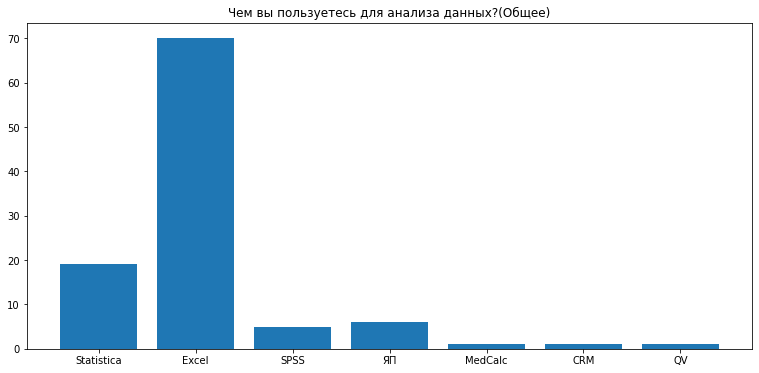

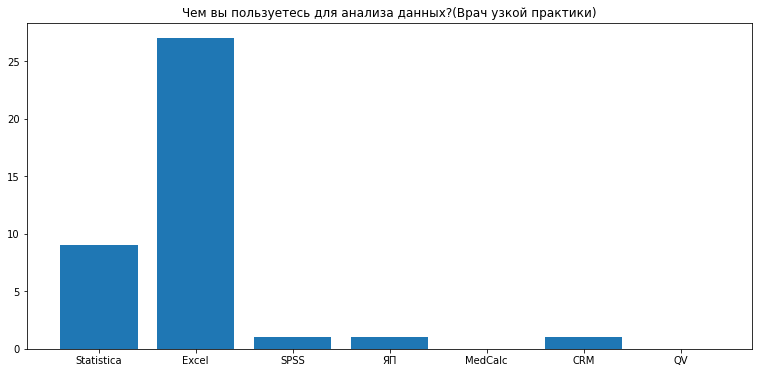

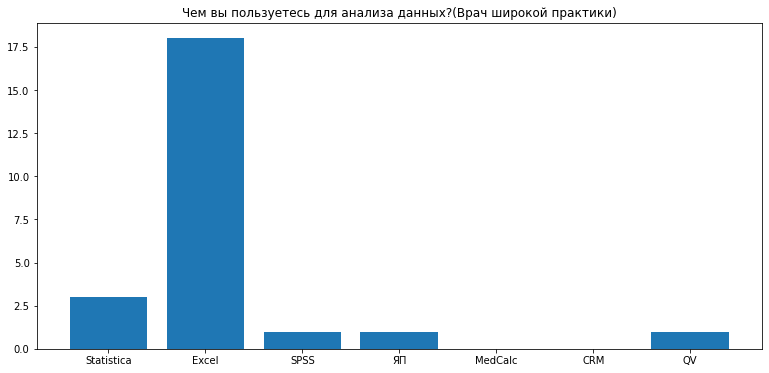

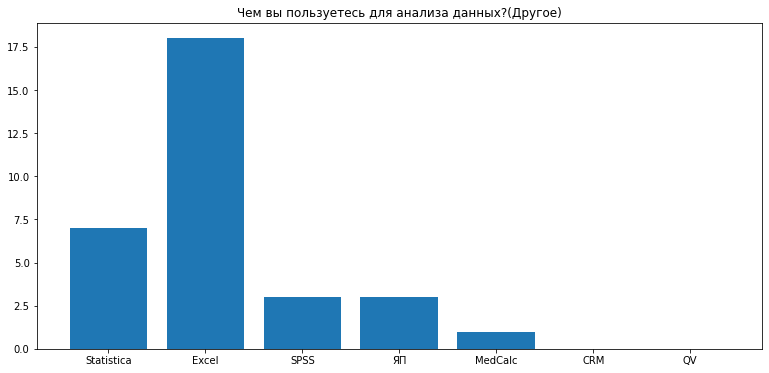

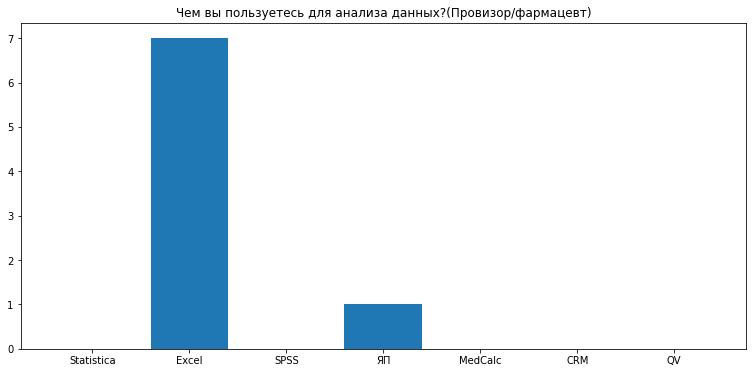

In [ ]:
bar_prod(data, title = 'Чем вы пользуетесь для анализа данных?(Общее)')
bar_prod(data[data['Specialization'] == 'Врач узкой практики'], title = 'Чем вы пользуетесь для анализа данных?(Врач узкой практики)')
bar_prod(data[data['Specialization'] == 'Врач широкой практики'], title = 'Чем вы пользуетесь для анализа данных?(Врач широкой практики)')
bar_prod(data[data['Specialization'] == 'Другое'], title = 'Чем вы пользуетесь для анализа данных?(Другое)')
bar_prod(data[data['Specialization'] == 'Провизор/фармацевт'], title = 'Чем вы пользуетесь для анализа данных?(Провизор/фармацевт)')

## Бывают ли у вас сложности в работе, вызванные неинтуитивным интерфейсом?

In [ ]:
pie_bi(data, col = 'InterfaceDifficulties', title = 'Бывают ли у вас сложности в работе, вызванные неинтуитивным интерфейсом?(Общее)')
pie_bi(data[data['Specialization'] == 'Врач узкой практики'], col = 'InterfaceDifficulties', title = 'Бывают ли у вас сложности в работе, вызванные неинтуитивным интерфейсом?(Врач узкой практики)')
pie_bi(data[data['Specialization'] == 'Врач широкой практики'], col = 'InterfaceDifficulties', title = 'Бывают ли у вас сложности в работе, вызванные неинтуитивным интерфейсом?(Врач широкой практики)')
pie_bi(data[data['Specialization'] == 'Другое'], col = 'InterfaceDifficulties', title = 'Бывают ли у вас сложности в работе, вызванные неинтуитивным интерфейсом?(Другое)')
pie_bi(data[data['Specialization'] == 'Провизор/фармацевт'], col = 'InterfaceDifficulties', title = 'Бывают ли у вас сложности в работе, вызванные неинтуитивным интерфейсом?(Провизор/фармацевт)')

## Вы выполняете анализ данных в одной программе?

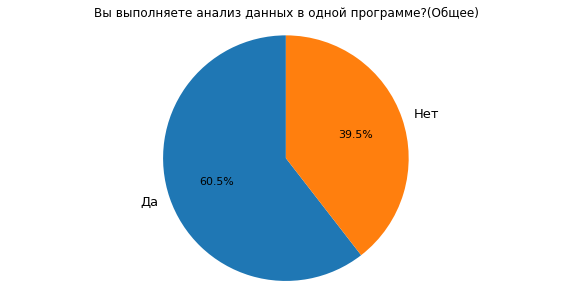

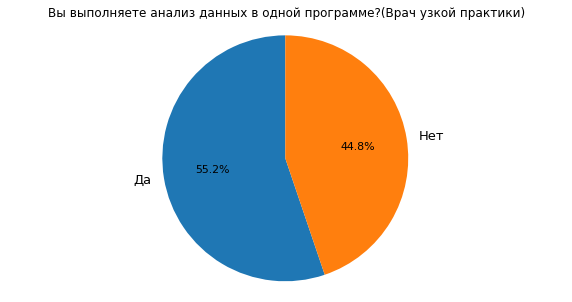

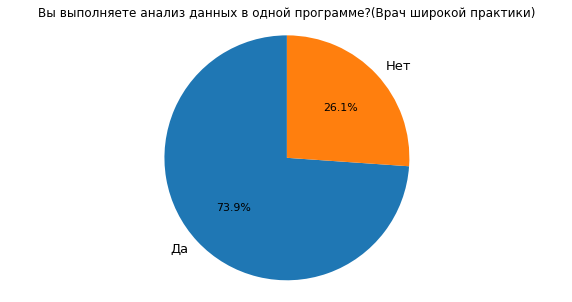

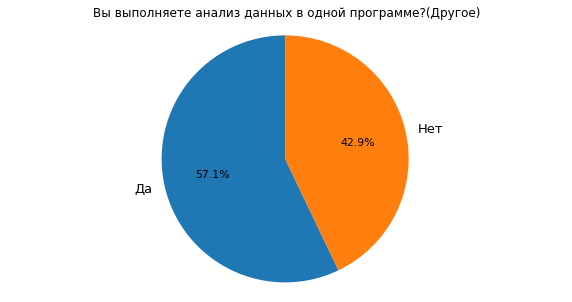

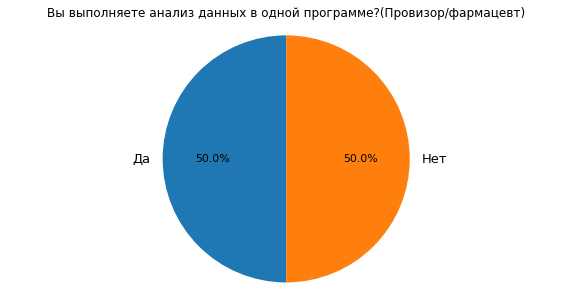

In [ ]:
pie_bi(data, col = 'OneSoftwareUsage', title = 'Вы выполняете анализ данных в одной программе?(Общее)')
pie_bi(data[data['Specialization'] == 'Врач узкой практики'], col = 'OneSoftwareUsage', title = 'Вы выполняете анализ данных в одной программе?(Врач узкой практики)')
pie_bi(data[data['Specialization'] == 'Врач широкой практики'], col = 'OneSoftwareUsage', title = 'Вы выполняете анализ данных в одной программе?(Врач широкой практики)')
pie_bi(data[data['Specialization'] == 'Другое'], col = 'OneSoftwareUsage', title = 'Вы выполняете анализ данных в одной программе?(Другое)')
pie_bi(data[data['Specialization'] == 'Провизор/фармацевт'], col = 'OneSoftwareUsage', title = 'Вы выполняете анализ данных в одной программе?(Провизор/фармацевт)')

## Вы встречаетесь с необходимостью изучать разную методическую литературу при работе с программами для анализа данных?

In [ ]:
pie_bi(data, col = 'MethodicalLiterature', title = 'Вы встречаетесь с необходимостью изучать разную методическую литературу\n при работе с программами для анализа данных?(Общее)')
pie_bi(data[data['Specialization'] == 'Врач узкой практики'], col = 'MethodicalLiterature', title = 'Вы встречаетесь с необходимостью изучать разную методическую литературу при работе с программами для анализа данных?(Врач узкой практики)')
pie_bi(data[data['Specialization'] == 'Врач широкой практики'], col = 'MethodicalLiterature', title = 'Вы встречаетесь с необходимостью изучать разную методическую литературу при работе с программами для анализа данных?(Врач широкой практики)')
pie_bi(data[data['Specialization'] == 'Другое'], col = 'MethodicalLiterature', title = 'Вы встречаетесь с необходимостью изучать разную методическую литературу при работе с программами для анализа данных?(Другое)')
pie_bi(data[data['Specialization'] == 'Провизор/фармацевт'], col = 'MethodicalLiterature', title = 'Вы встречаетесь с необходимостью изучать разную методическую литературу при работе с программами для анализа данных?(Провизор/фармацевт)')

## Как бы вы оценили свою математическую и статистическую подготовку от 1 до 5(1 - крайне слабая, 5 - очень сильная)?

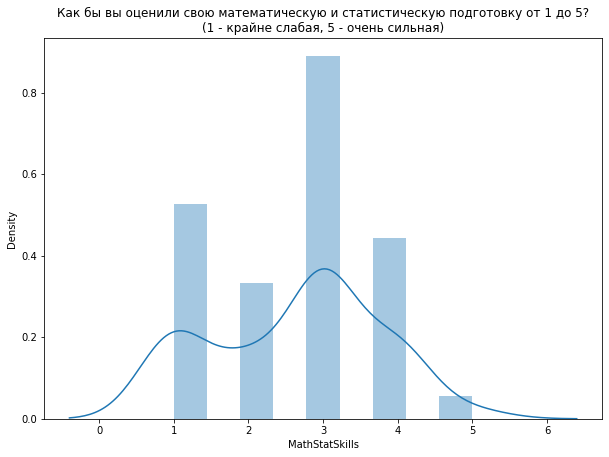

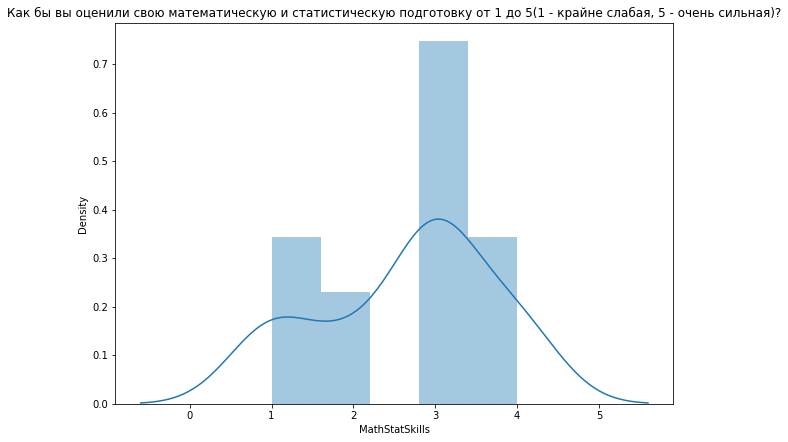

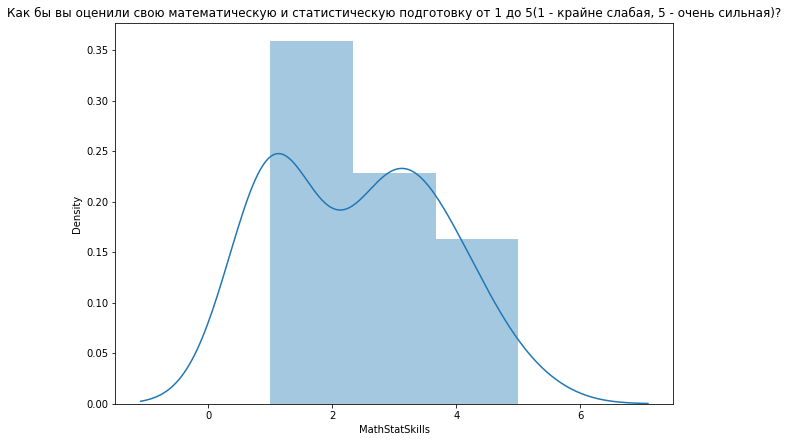

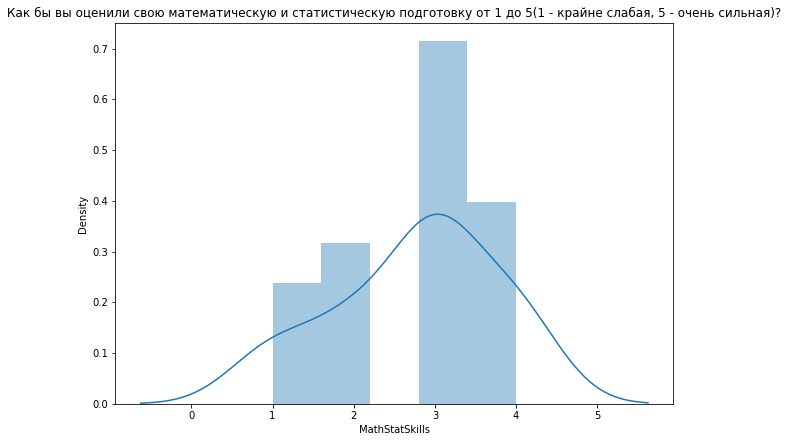

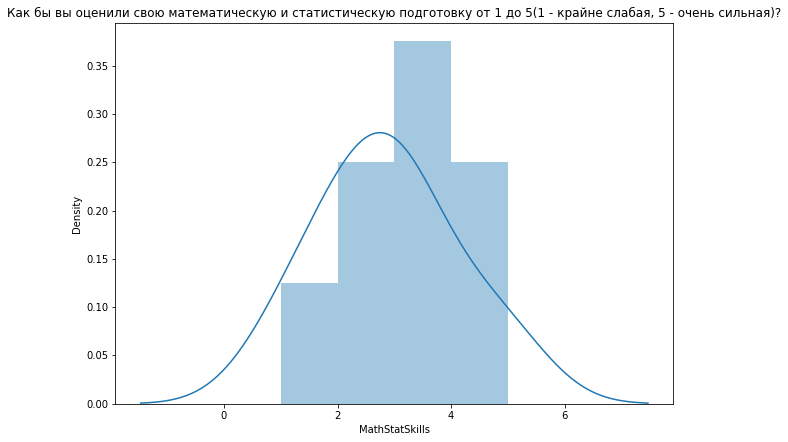

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(data['MathStatSkills'])
ax.set_title('Как бы вы оценили свою математическую и статистическую подготовку от 1 до 5?\n(1 - крайне слабая, 5 - очень сильная)')

plt.show()

fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(data[data['Specialization'] == 'Врач узкой практики']['MathStatSkills'])
ax.set_title('Как бы вы оценили свою математическую и статистическую подготовку от 1 до 5(1 - крайне слабая, 5 - очень сильная)?')

plt.show()

fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(data[data['Specialization'] == 'Врач широкой практики']['MathStatSkills'])
ax.set_title('Как бы вы оценили свою математическую и статистическую подготовку от 1 до 5(1 - крайне слабая, 5 - очень сильная)?')

plt.show()

fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(data[data['Specialization'] == 'Другое']['MathStatSkills'])
ax.set_title('Как бы вы оценили свою математическую и статистическую подготовку от 1 до 5(1 - крайне слабая, 5 - очень сильная)?')

plt.show()

fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(data[data['Specialization'] == 'Провизор/фармацевт']['MathStatSkills'])
ax.set_title('Как бы вы оценили свою математическую и статистическую подготовку от 1 до 5(1 - крайне слабая, 5 - очень сильная)?')

plt.show()

## Много ли времени занимает у вас проведение анализа биоэквивалентности?

In [ ]:
percYes = round(100*data['BioequivalenceIsLongTime'].dropna().value_counts()[1]/(data['BioequivalenceIsLongTime'].dropna().value_counts()[1] + data['BioequivalenceIsLongTime'].dropna().value_counts()[0]), 1)
sizes = [percYes, 100 - percYes]
labels = 'Да', 'Нет'

fig, ax = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
ax.axis('equal')
ax.set_title('Много ли времени занимает у вас проведение анализа биоэквивалентности?')
plt.setp(autotexts, size = 11)

plt.show()

In [ ]:
pie_tern(data, col = 'BioequivalenceIsLongTime', title = 'Много ли времени занимает у вас проведение анализа биоэквивалентности?(Общее)')
pie_tern(data[data['Specialization'] == 'Врач узкой практики'], col = 'BioequivalenceIsLongTime', title = 'Много ли времени занимает у вас проведение анализа биоэквивалентности?(Врач узкой практики)')
pie_tern(data[data['Specialization'] == 'Врач широкой практики'], col = 'BioequivalenceIsLongTime', title = 'Много ли времени занимает у вас проведение анализа биоэквивалентности?(Врач широкой практики)')
pie_tern(data[data['Specialization'] == 'Другое'], col = 'BioequivalenceIsLongTime', title = 'Много ли времени занимает у вас проведение анализа биоэквивалентности?(Другое)')
pie_tern(data[data['Specialization'] == 'Провизор/фармацевт'], col = 'BioequivalenceIsLongTime', title = 'Много ли времени занимает у вас проведение анализа биоэквивалентности?(Провизор/фармацевт)')

## Вы имеете достаточно практического опыта в использовании статистических программ?

In [ ]:
data[data['Specialization'] == 'Провизор/фармацевт']['EnoughPracExperience'].value_counts()

0    6
1    2
Name: EnoughPracExperience, dtype: int64

In [ ]:
pie_bi(data, col = 'EnoughPracExperience', title = 'Вы имеете достаточно практического опыта\n в использовании статистических программ?(Общее)')
pie_bi(data[data['Specialization'] == 'Врач узкой практики'], col = 'EnoughPracExperience', title = 'Вы имеете достаточно практического опыта в использовании статистических программ?(Врач узкой практики)')
pie_bi(data[data['Specialization'] == 'Врач широкой практики'], col = 'EnoughPracExperience', title = 'Вы имеете достаточно практического опыта в использовании статистических программ?(Врач широкой практики)')
pie_bi(data[data['Specialization'] == 'Другое'], col = 'EnoughPracExperience', title = 'Вы имеете достаточно практического опыта в использовании статистических программ?(Другое)')
pie_bi(data[data['Specialization'] == 'Провизор/фармацевт'], col = 'EnoughPracExperience', title = 'Вы имеете достаточно практического опыта в использовании статистических программ?(Провизор/фармацевт)')

## Сталкивались ли вы с проблемой в понимании того, как правильно проинтерпретировать результаты статистических тестов?

In [ ]:
pie_bi(data, col = 'InterpretationDifficulties', title = 'Сталкивались ли вы с проблемой в понимании того, как правильно\n проинтерпретировать результаты статистических тестов?(Общее)')
pie_bi(data[data['Specialization'] == 'Врач узкой практики'], col = 'InterpretationDifficulties', title = 'Сталкивались ли вы с проблемой в понимании того, как правильно проинтерпретировать результаты статистических тестов?(Врач узкой практики)')
pie_bi(data[data['Specialization'] == 'Врач широкой практики'], col = 'InterpretationDifficulties', title = 'Сталкивались ли вы с проблемой в понимании того, как правильно проинтерпретировать результаты статистических тестов?(Врач широкой практики)')
pie_bi(data[data['Specialization'] == 'Другое'], col = 'InterpretationDifficulties', title = 'Сталкивались ли вы с проблемой в понимании того, как правильно проинтерпретировать результаты статистических тестов?(Другое)')
pie_bi(data[data['Specialization'] == 'Провизор/фармацевт'], col = 'InterpretationDifficulties', title = 'Сталкивались ли вы с проблемой в понимании того, как правильно проинтерпретировать результаты статистических тестов?(Провизор/фармацевт)')

## Вам важно, чтобы в используемом вами продукте был представлен широкий набор статистических тестов?

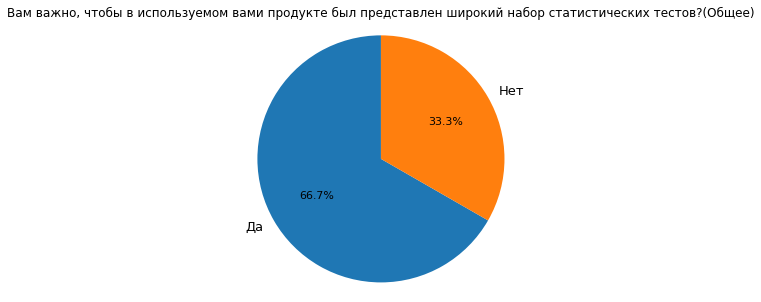

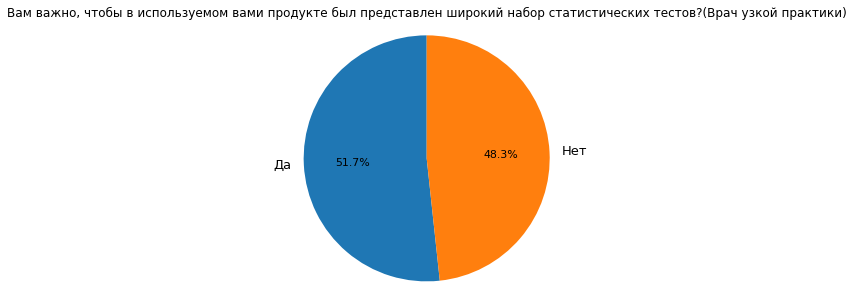

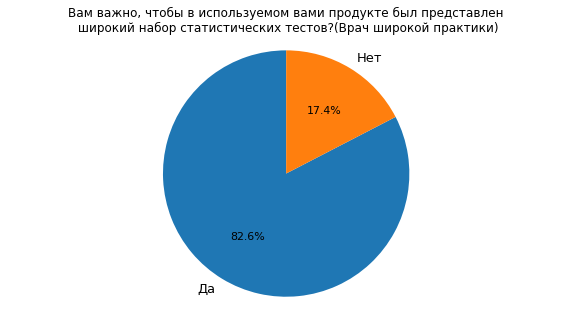

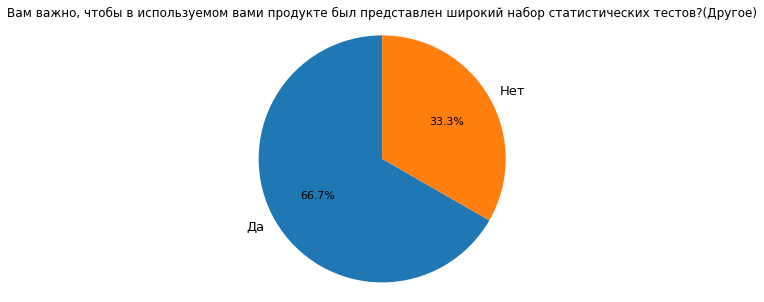

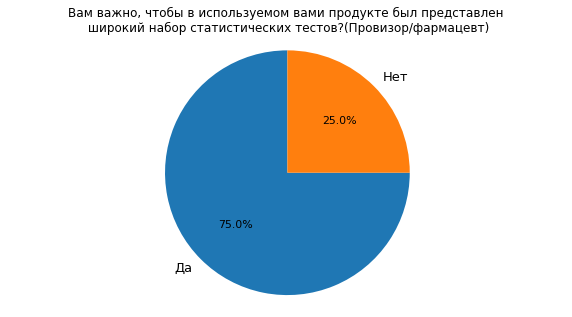

In [ ]:
pie_bi(data, col = 'NeedWideRangeOfTests', title = 'Вам важно, чтобы в используемом вами продукте был представлен широкий набор статистических тестов?(Общее)')
pie_bi(data[data['Specialization'] == 'Врач узкой практики'], col = 'NeedWideRangeOfTests', title = 'Вам важно, чтобы в используемом вами продукте был представлен широкий набор статистических тестов?(Врач узкой практики)')
pie_bi(data[data['Specialization'] == 'Врач широкой практики'], col = 'NeedWideRangeOfTests', title = 'Вам важно, чтобы в используемом вами продукте был представлен\n широкий набор статистических тестов?(Врач широкой практики)')
pie_bi(data[data['Specialization'] == 'Другое'], col = 'NeedWideRangeOfTests', title = 'Вам важно, чтобы в используемом вами продукте был представлен широкий набор статистических тестов?(Другое)')
pie_bi(data[data['Specialization'] == 'Провизор/фармацевт'], col = 'NeedWideRangeOfTests', title = 'Вам важно, чтобы в используемом вами продукте был представлен\n широкий набор статистических тестов?(Провизор/фармацевт)')

## Какими статистическими тестами и критериями вы пользуетесь регулярно и их наличие в программе для вас критически необходимо?

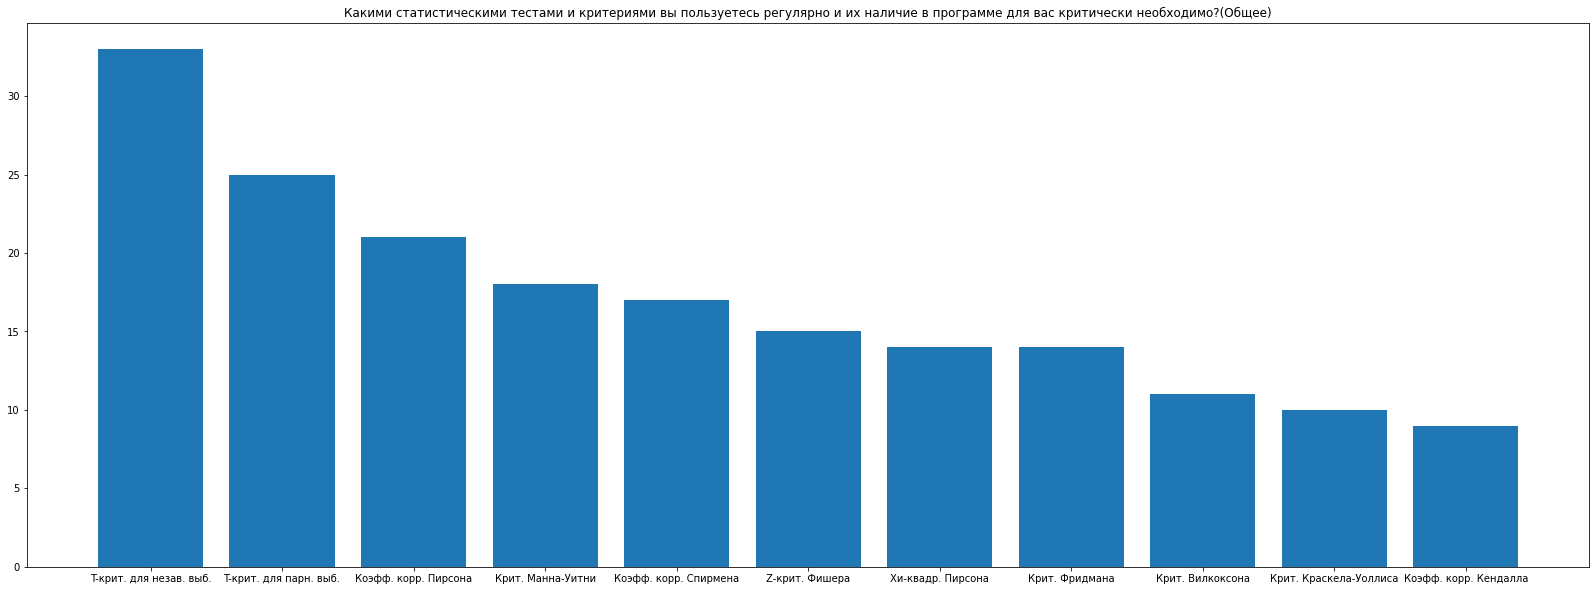

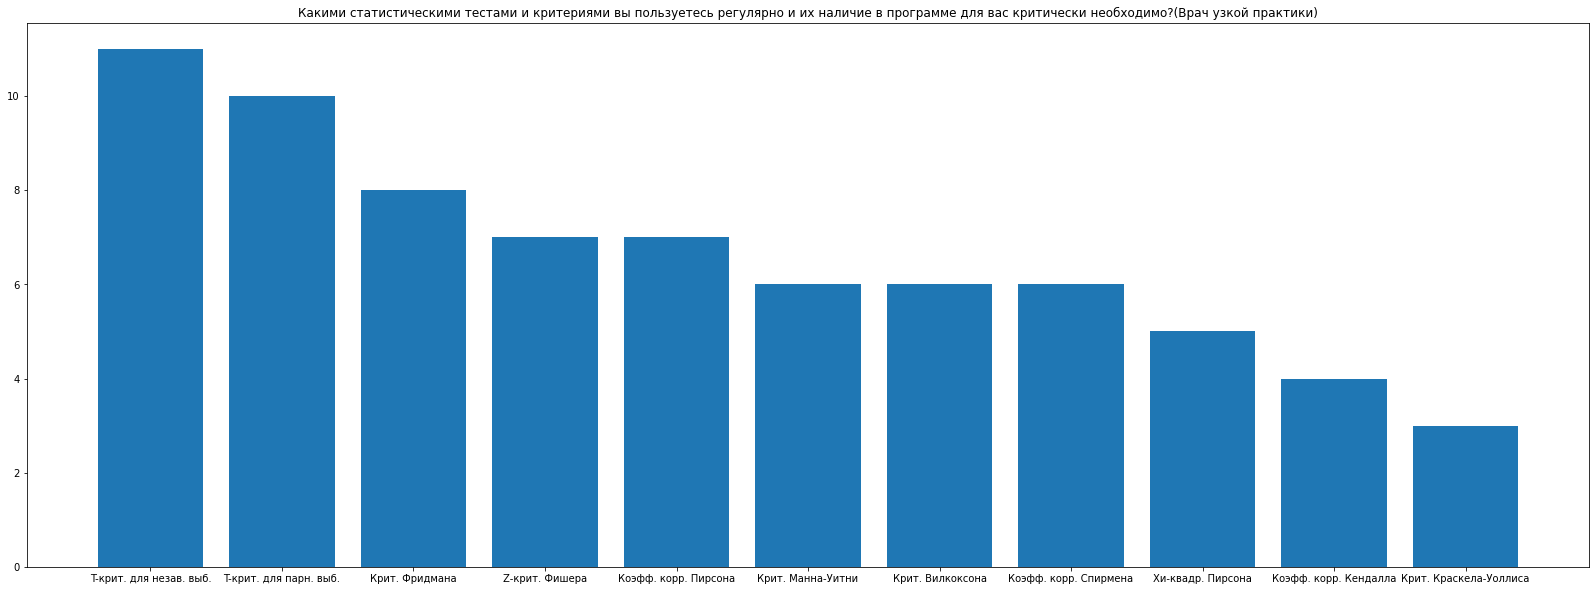

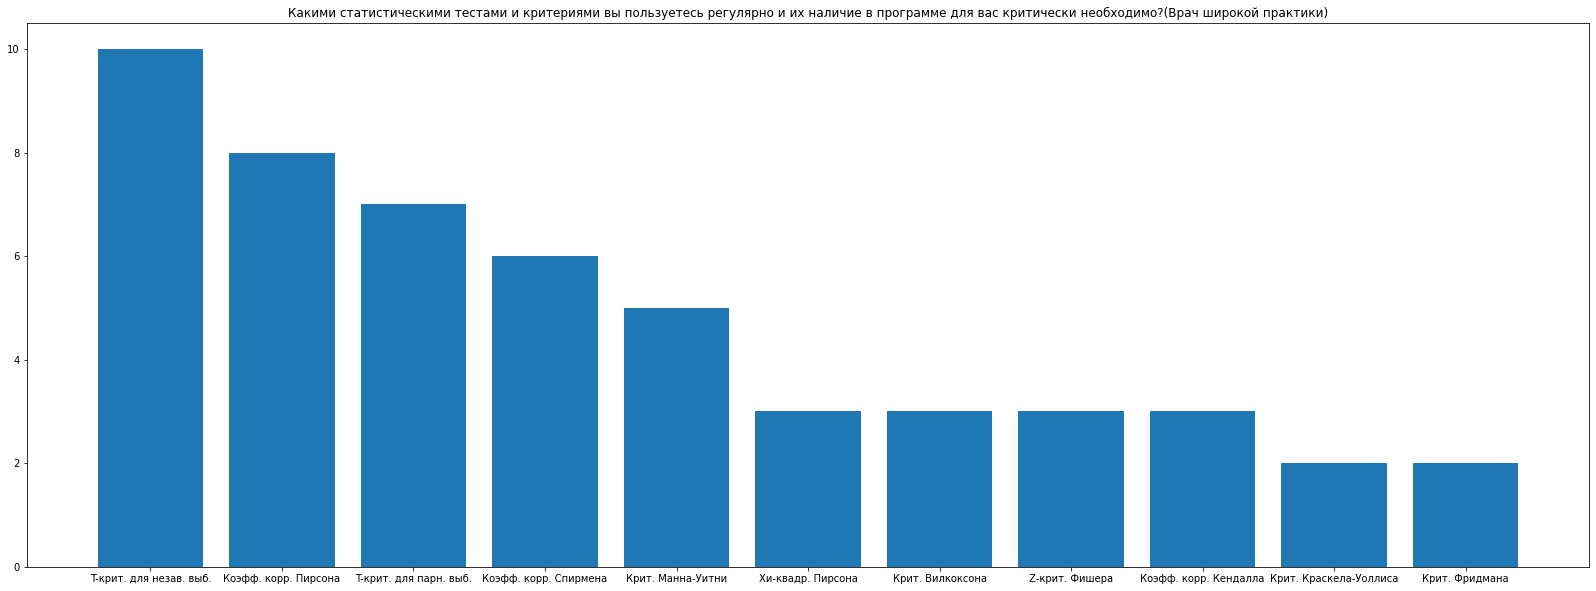

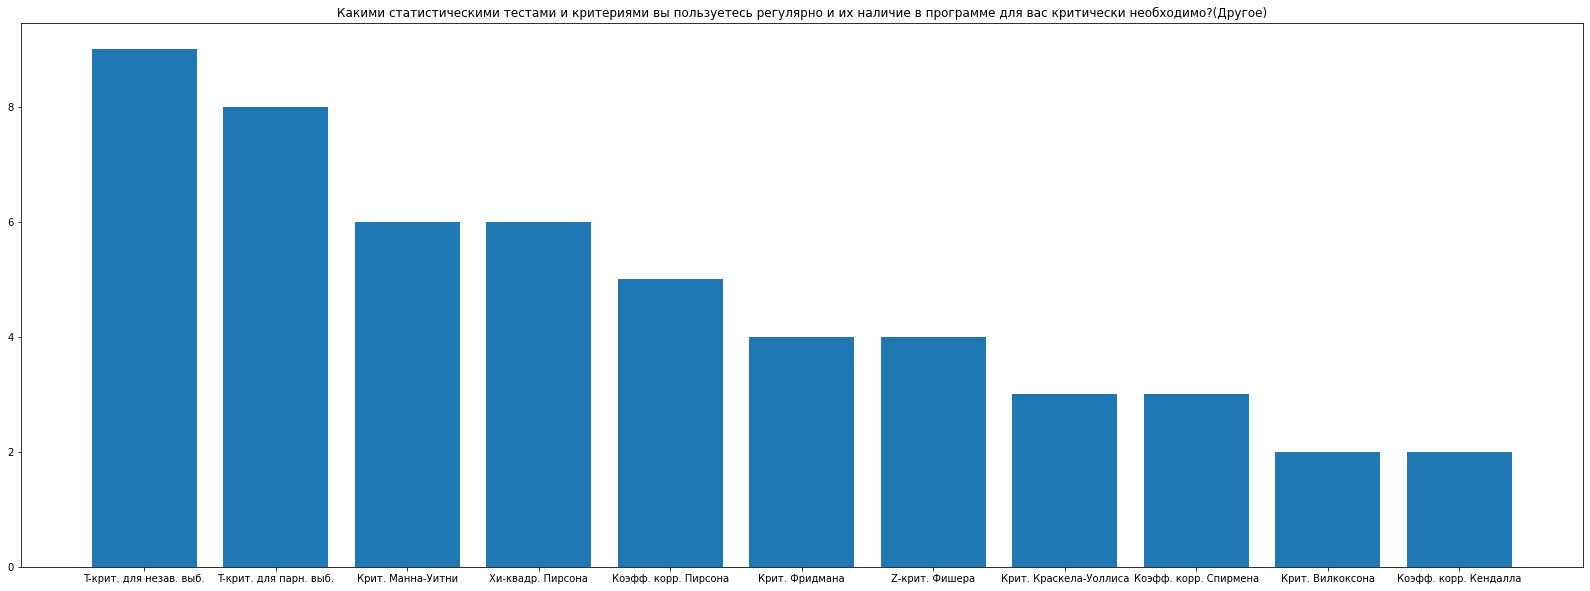

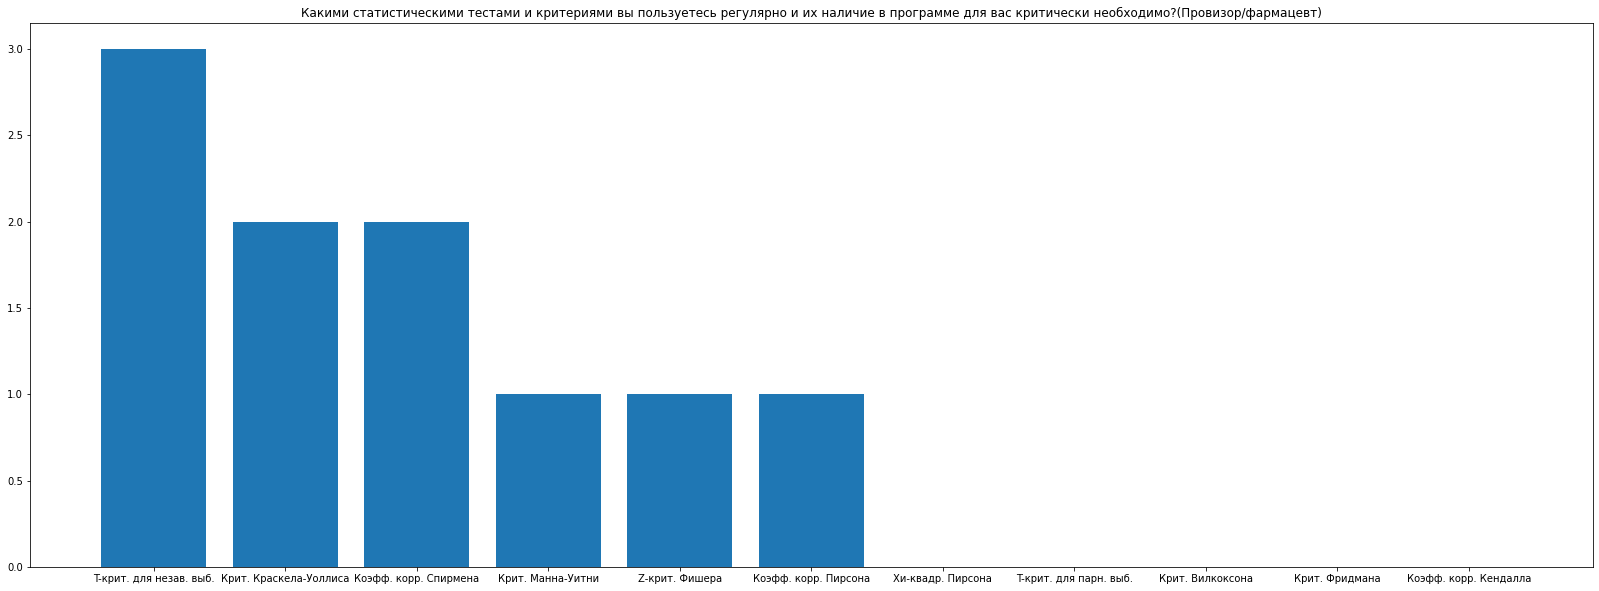

In [ ]:
bars_tests(data, title = 'Какими статистическими тестами и критериями вы пользуетесь регулярно и их наличие в программе для вас критически необходимо?(Общее)')
bars_tests(data[data['Specialization'] == 'Врач узкой практики'], title = 'Какими статистическими тестами и критериями вы пользуетесь регулярно и их наличие в программе для вас критически необходимо?(Врач узкой практики)')
bars_tests(data[data['Specialization'] == 'Врач широкой практики'], title = 'Какими статистическими тестами и критериями вы пользуетесь регулярно и их наличие в программе для вас критически необходимо?(Врач широкой практики)')
bars_tests(data[data['Specialization'] == 'Другое'], title = 'Какими статистическими тестами и критериями вы пользуетесь регулярно и их наличие в программе для вас критически необходимо?(Другое)')
bars_tests(data[data['Specialization'] == 'Провизор/фармацевт'], title = 'Какими статистическими тестами и критериями вы пользуетесь регулярно и их наличие в программе для вас критически необходимо?(Провизор/фармацевт)')

## Расскажите, в чем проявлялись трудности, вызванные неинтуитивным интерфейсом?

## Чем для вас вызвана необходимость пользоваться больше чем одной программой для анализа данных?

## Расскажите, интерпретация результатов каких статистических методов для вас наиболее затруднительна?

## Что могло бы помочь вам тратить на интерпретацию результатов меньше времени и сил?

## Вы сталкивались с ситуациями, когда вам нужно было быстро провести простой анализ данных, и вы не хотели ради этого использовать языки программирования или тяжелые программы?

In [ ]:
pie_bi_na(data, col = 'SimpleDataAnalysis', title = 'Вы сталкивались с ситуациями, когда вам нужно было быстро провести простой анализ данных,\n и вы не хотели ради этого использовать языки программирования или тяжелые программы?(Общее)')
pie_bi_na(data[data['Specialization'] == 'Врач узкой практики'], col = 'SimpleDataAnalysis', title = 'Вы сталкивались с ситуациями, когда вам нужно было быстро провести простой анализ данных, и вы не хотели ради этого использовать языки программирования или тяжелые программы?(Врач узкой практики)')
pie_bi_na(data[data['Specialization'] == 'Врач широкой практики'], col = 'SimpleDataAnalysis', title = 'Вы сталкивались с ситуациями, когда вам нужно было быстро провести простой анализ данных, и вы не хотели ради этого использовать языки программирования или тяжелые программы?(Врач широкой практики)')
pie_bi_na(data[data['Specialization'] == 'Другое'], col = 'SimpleDataAnalysis', title = 'Вы сталкивались с ситуациями, когда вам нужно было быстро провести простой анализ данных, и вы не хотели ради этого использовать языки программирования или тяжелые программы?(Другое)')
pie_bi_na(data[data['Specialization'] == 'Провизор/фармацевт'], col = 'SimpleDataAnalysis', title = 'Вы сталкивались с ситуациями, когда вам нужно было быстро провести простой анализ данных, и вы не хотели ради этого использовать языки программирования или тяжелые программы?(Провизор/фармацевт)')

## Вам важно наличие широкого набора прогностических моделей в продукте, которым вы пользуетесь?

In [ ]:
pie_bi_na(data, col = 'WideRangeOfModels', title = 'Вам важно наличие широкого набора прогностических моделей в продукте, которым вы пользуетесь?(Общее)')
pie_bi_na(data[data['Specialization'] == 'Врач узкой практики'], col = 'WideRangeOfModels', title = 'Вам важно наличие широкого набора прогностических моделей\n в продукте, которым вы пользуетесь?(Врач узкой практики)')
pie_bi_na(data[data['Specialization'] == 'Врач широкой практики'], col = 'WideRangeOfModels', title = 'Вам важно наличие широкого набора прогностических моделей в продукте, которым вы пользуетесь?(Врач широкой практики)')
pie_bi_na(data[data['Specialization'] == 'Другое'], col = 'WideRangeOfModels', title = 'Вам важно наличие широкого набора прогностических моделей в продукте, которым вы пользуетесь?(Другое)')
pie_bi_na(data[data['Specialization'] == 'Провизор/фармацевт'], col = 'WideRangeOfModels', title = 'Вам важно наличие широкого набора прогностических моделей в продукте, которым вы пользуетесь?(Провизор/фармацевт)')

## Вы хотели бы иметь возможность настраивать гиперпараметры модели в интерактивном режиме?

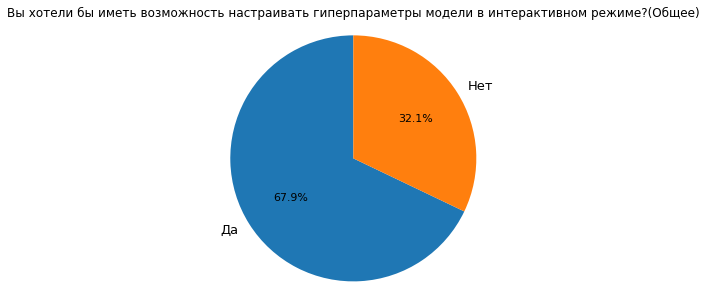

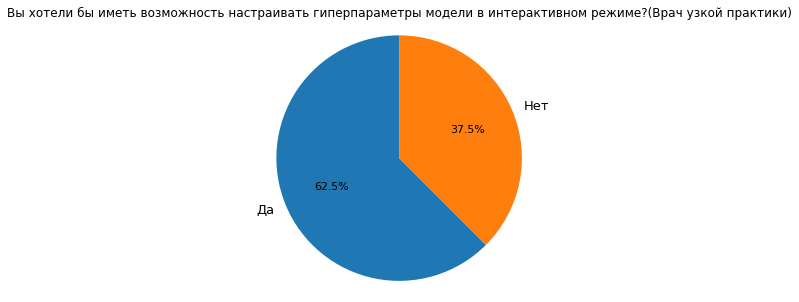

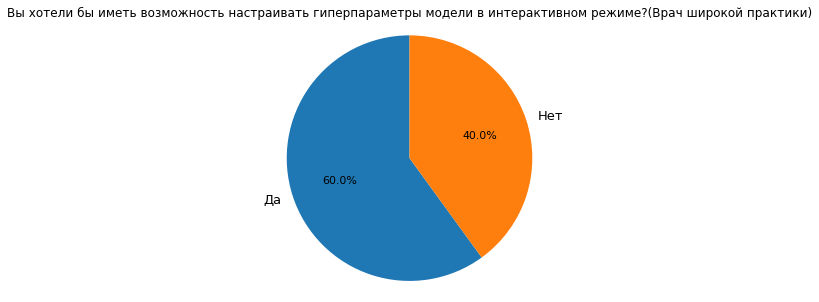

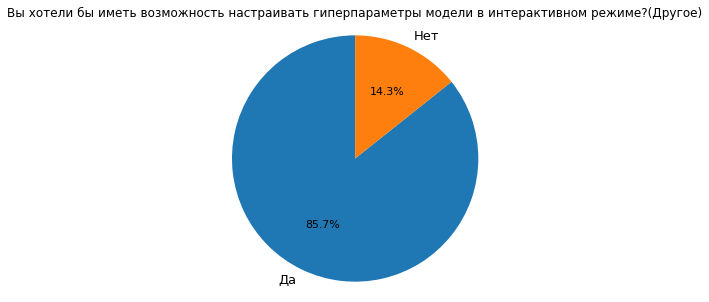

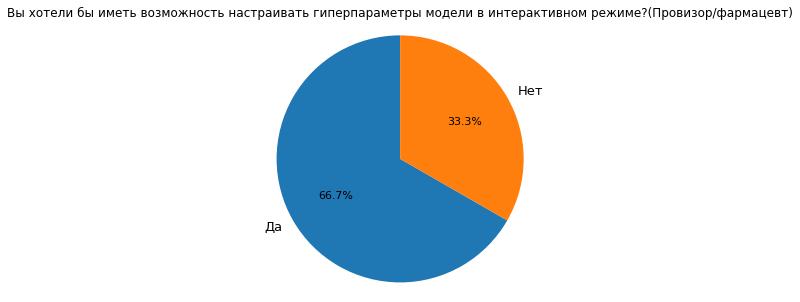

In [ ]:
pie_bi_na(data, col = 'HyperparamsInteractiveMode', title = 'Вы хотели бы иметь возможность настраивать гиперпараметры модели в интерактивном режиме?(Общее)')
pie_bi_na(data[data['Specialization'] == 'Врач узкой практики'], col = 'HyperparamsInteractiveMode', title = 'Вы хотели бы иметь возможность настраивать гиперпараметры модели в интерактивном режиме?(Врач узкой практики)')
pie_bi_na(data[data['Specialization'] == 'Врач широкой практики'], col = 'HyperparamsInteractiveMode', title = 'Вы хотели бы иметь возможность настраивать гиперпараметры модели в интерактивном режиме?(Врач широкой практики)')
pie_bi_na(data[data['Specialization'] == 'Другое'], col = 'HyperparamsInteractiveMode', title = 'Вы хотели бы иметь возможность настраивать гиперпараметры модели в интерактивном режиме?(Другое)')
pie_bi_na(data[data['Specialization'] == 'Провизор/фармацевт'], col = 'HyperparamsInteractiveMode', title = 'Вы хотели бы иметь возможность настраивать гиперпараметры модели в интерактивном режиме?(Провизор/фармацевт)')

## Какой анализ данных вы хотели бы выполнять без использования языков программирования и тяжелых статистических программ?

In [ ]:
y = 'Какой анализ данных вы хотели бы выполнять без использования языков программирования и тяжелых статистических программ?'
bars_analysis(data, title = y + '(Общее)')
bars_analysis(data[data['Specialization'] == 'Врач узкой практики'], title = y + '(Врач узкой практики)')
bars_analysis(data[data['Specialization'] == 'Врач широкой практики'], title = y + '(Врач широкой практики)')
bars_analysis(data[data['Specialization'] == 'Другое'], title = y + '(Другое)')
bars_analysis(data[data['Specialization'] == 'Провизор/фармацевт'], title = y + '(Провизор/фармацевт)')

## Какие прогностические модели вы используете в своей работе?

In [ ]:
data[data['Specialization'] == 'Провизор/фармацевт'][['Log_Reg',
                'Lin_Reg',
                'KNN',
                'SVMs',
                'Dec_Tree',
                'Rand_Forest',
                'Neur_Net',
                'Other']].sum()

Log_Reg        1
Lin_Reg        2
KNN            0
SVMs           0
Dec_Tree       1
Rand_Forest    1
Neur_Net       2
Other          0
dtype: int64

In [ ]:
y = 'Какие прогностические модели вы используете в своей работе?'
bars_models(data, title = y)
bars_models(data[data['Specialization'] == 'Врач узкой практики'], title = y + '(Врач узкой практики)')
bars_models(data[data['Specialization'] == 'Врач широкой практики'], title = y + '(Врач широкой практики)')
bars_models(data[data['Specialization'] == 'Другое'], title = y + '(Другое)')
bars_models(data[data['Specialization'] == 'Провизор/фармацевт'], title = y + '(Провизор/фармацевт)')